# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Autumn 2020
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 9:35AM
- Student Name: Bianca Dizon
- Student Email: dizon.11@osu.edu
- Student ID: 500126259

Template Version V1.
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

In this assignment, I will be analyzing an aletered copy of the "Our World in Data COVID-19" dataset to identify interesting trends and patterns. I will be creating a final dataset that is usable in building classification models.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

***
# Section: 1 - Business Understanding
- Write a paragraph providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***


# Overview
    The dataset provided came from multiple sources. The data for the confirmed cases and deaths came from the European Centre for Disease Prevention and Control (ECDC). The data for the testing for COVID-19 was collected by the Our World in Data team from official reports. The data for all the other variables were collected from a variety of sources including the United Nations, World Bank, Global Burden if Disease, etc. The data was and is currently being collected using the ECDC data made available daily through an uodated clean downloadable file. The ECDC collects the data from all the countries around the world. The data was collected to keep track of the COVID pandemic and to assist in COVID research efforts. The data is being used to report the state of all countried during the pandemic. The rows represent the location the COVID data is from, the date, and stats pertaining to COVID. The rows also include information about a country's population like population density, median age, handwashing habits, etc. Researchers, healthcare professionals, and policy makers might use this data to help them understand the state of the pandemic and how to plan accordingly. Types of questions many users might be able to analyze with this data include trends in positive cases with reference to location. Furthermore, this dataset can be used to analyze if age plays a role in the effect of COVID. Overall, the dataset can be analyzed to find trends in number of cases in association with a country's population and societal statistics.


***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class.
***

In [47]:
df = pd.read_excel('ALTERED owid-covid-data.xlsx', sheet_name = 'ALTERED owid-covid-data')
df.head()

,RECID,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,NEW_CASE_TREND
0,1,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
1,2,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
2,3,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
3,4,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
4,5,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN


In the following box I will be finding correlations between attributes pertaining to 

In [52]:
df_copy1 = df.copy()
df_copy1 = df_copy1.drop(['RECID','iso_code','continent','total_cases','total_deaths','date','new_cases','new_cases_smoothed','new_deaths','new_deaths_smoothed','new_deaths_per_million', 'new_deaths_smoothed_per_million','new_tests','total_tests','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','new_cases_per_million', 'new_cases_smoothed_per_million','NEW_CASE_TREND'], axis=1)
df_copy1 = df_copy1.drop(['location'])
df_copy1.head()


,location,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In the following code box I will be finding correlations between the attributes.

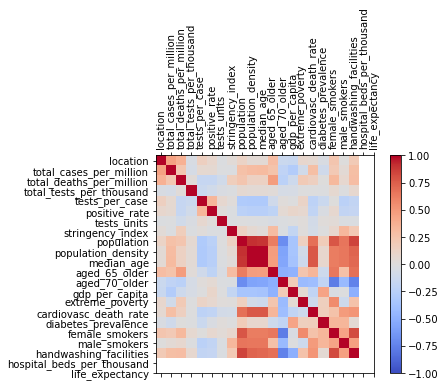

In [59]:

corr = df_copy1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_copy1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_copy1.columns)
ax.set_yticklabels(df_copy1.columns)
plt.show()

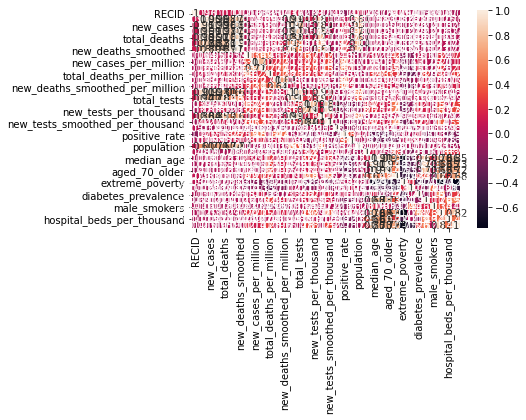

In [16]:
sns.heatmap(df.corr(), annot = True)
plt.show()

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.
***

***
### Attribute Summary: 
(attribute_name: attribute level, meaning)
- RECID: nominal, number assigned to locations in alphabetical order and at certain dates in chronological order
- iso_code: nominal, internationally recognized codes that designate every country	
- continent: nominal, name of continent that location(country) belongs to	
- location: nomimal, name of country where data is from
- date: interval, date of when data was collected
- total_cases: ratio, total number of covid cases  
- new_cases: ratio, total number of new covid cases during the date	
- new_cases_smoothed: ratio, moving average from the day before to the day after each date shown of total number of new covid cases 
- total_deaths: ratio, total number of covid deaths 
- new_deaths: ratio, total number of new covid deaths during the date	
- new_deaths_smoothed: ratio, moving average from the day before to the day after each date shown of total number of new covid deaths  	
- total_cases_per_million: ratio, total number of covid cases per million
- new_cases_per_million: ratio, total number of new covid cases per million
- new_cases_smoothed_per_million: ratio, moving average from the day before to the day after each date shown of total number of new covid cases per million
- total_deaths_per_million: ratio, total number of covid deaths per million	
- new_deaths_per_million: ratio, total number of new covid deaths per million
- new_deaths_smoothed_per_million: ratio, moving average from the day before to the day after each date shown of total number of new covid deaths per million 
- new_tests: ratio, total number of new covid tests during the date	 
- total_tests: ratio, total number of covid tests	
- total_tests_per_thousand: ratio, total number of covid tests per thousand	
- new_tests_per_thousand: ratio, total number of new covid tests during the date per thousand	
- new_tests_smoothed: ratio, moving average from the day before to the day after each date shown of total number of new covid tests   	
- new_tests_smoothed_per_thousand: ratio, moving average from the day before to the day after each date shown of total number of new covid tests per thousand
- tests_per_case: ratio, number of tests per covid case	
- positive_rate: ration, positive rate of tested in country
- tests_units: nominal, Units used by the location to report its testing data
- stringency_index: ratio, computable parameter for evaluating the effectiveness of the nationwide lockdown	
- population: ratio, population of the location	
- population_density: ratio, number of people living in each unit of area (most likely square kilometers)	
- median_age: ratio, median age of the location's population	
- aged_65_older: ratio, percentage of population that is 65 or older	
- aged_70_older: ratio, percentage of population that is 70 or older	
- gdp_per_capita: ratio, measure of a country's economic output per person	
- extreme_poverty:ratio, percentage of population in extreme poverty	
- cardiovasc_death_rate: ratio, Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) 	
- diabetes_prevalence: ratio, percentage of population with diabetes	
- female_smokers: ratio, percentage of female smokers from the population
- male_smokers: ratio, percentage of male smokers from the population
- handwashing_facilities: ratio, share of the population with basic handwashing facilities on premises, most recent year available	
- hospital_beds_per_thousand: ratio, Hospital beds per 1,000 people, most recent year available since 2010	
- life_expectancy: ratio, life expectancy at birth 	
- NEW_CASE_TREND: ordinal, type of covid growth 
***

In [77]:
# Check the data types
df.dtypes

RECID                                       int64
iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64


***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [114]:
print('Statistics for total_cases per location:')
df.groupby('location')['total_cases'].describe()

Statistics for total_cases per location:


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,243.0,1.462470e+04,1.610030e+04,0.0,1.00,4402.0,34137.0,38520.0
Albania,186.0,2.841667e+03,3.012825e+03,2.0,641.25,1254.5,4544.0,10553.0
Algeria,249.0,1.144602e+04,1.434287e+04,0.0,3.00,5182.0,17348.0,46938.0
Andorra,180.0,7.736111e+02,2.661866e+02,1.0,742.25,852.0,897.0,1261.0
Angola,172.0,6.227616e+02,8.632025e+02,2.0,35.00,141.0,936.5,2981.0
...,...,...,...,...,...,...,...,...
Western Sahara,137.0,3.826715e+02,3.574054e+02,6.0,23.00,461.0,766.0,766.0
World,254.0,7.002488e+06,8.193672e+06,27.0,91622.75,3586353.0,11750783.0,27609408.0
Yemen,153.0,9.638824e+02,7.627824e+02,1.0,128.00,1015.0,1730.0,1994.0


In [116]:
print('Statistics for new_cases_smoothed per location:')
df.groupby('location')['new_cases_smoothed'].describe()

Statistics for new_cases_smoothed per location:


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,247.0,155.333113,216.831069,0.000,0.42900,52.2860,245.78550,758.571
Albania,180.0,56.258728,48.961955,5.286,14.85700,25.1430,95.17850,159.429
Algeria,248.0,185.729246,196.721052,0.000,1.49975,114.0000,343.14275,622.429
Andorra,185.0,6.609308,8.139193,0.000,0.28600,3.5710,11.28600,33.857
Angola,166.0,17.259036,20.285218,0.000,1.28600,5.9285,31.46400,73.571
...,...,...,...,...,...,...,...,...
Western Sahara,131.0,5.808130,14.703411,0.000,0.00000,0.0000,0.28600,70.571
World,248.0,108374.769008,96085.405805,0.000,4497.53550,83064.3575,197768.67825,270541.143
Yemen,147.0,13.500490,10.867933,0.000,5.78550,10.7140,20.21450,52.143


In [117]:
print('Statistics for total_deaths per location:')
df.groupby('location')['total_deaths'].describe()

Statistics for total_deaths per location:


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,243.0,443.090535,543.293241,0.0,0.0,120.0,975.50,1418.0
Albania,186.0,84.693548,89.880267,0.0,27.0,34.0,126.75,321.0
Algeria,249.0,552.156627,521.857712,0.0,0.0,483.0,978.00,1571.0
Andorra,180.0,42.694444,16.527308,0.0,40.0,51.0,52.00,53.0
Angola,172.0,27.546512,36.543063,0.0,2.0,6.0,40.25,120.0
...,...,...,...,...,...,...,...,...
Western Sahara,137.0,0.751825,0.433539,0.0,1.0,1.0,1.00,1.0
World,254.0,301415.468504,293956.371277,0.0,3139.0,254600.5,538732.00,898087.0
Yemen,153.0,266.274510,221.652414,0.0,20.0,274.0,494.00,576.0


In [118]:
print('Statistics for new_deaths per location:')
df.groupby('location')['new_deaths'].describe()

Statistics for new_deaths per location:


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Afghanistan,243.0,5.835391,9.716522,0.0,0.0,1.0,7.50,56.0
Albania,186.0,1.725806,1.927070,0.0,0.0,1.0,3.00,6.0
Algeria,249.0,6.309237,5.813357,0.0,0.0,7.0,9.00,42.0
Andorra,180.0,0.294444,0.690698,0.0,0.0,0.0,0.00,4.0
Angola,172.0,0.697674,1.214626,0.0,0.0,0.0,1.00,6.0
...,...,...,...,...,...,...,...,...
Western Sahara,137.0,0.007299,0.085436,0.0,0.0,0.0,0.00,1.0
World,254.0,3535.775591,2660.093327,0.0,124.0,4127.5,5587.75,10491.0
Yemen,153.0,3.764706,6.580238,0.0,1.0,2.0,4.00,52.0


In [1]:
print('Statistics for new_deaths_smoothed per location:')
df.groupby('location')['new_deaths_smoothed'].describe()

Statistics for new_deaths_smoothed per location:


NameError: name 'df' is not defined

In [ ]:
print('Statistics for total_cases_per_million per location:')
df.groupby('location')['total_cases_per_million'].describe()

In [ ]:
print('Statistics for new_cases_per_million per location:')
df.groupby('location')['new_cases_per_million'].describe()

In [ ]:
print('Statistics for new_cases_smoothed_per_million per location:')
df.groupby('location')['new_cases_smoothed_per_million'].describe()

In [ ]:
print('Statistics for total_deaths_per_million per location:')
df.groupby('location')['total_deaths_per_million'].describe()

In [ ]:
print('Statistics for new_deaths_per_million per location:')
df.groupby('location')['new_deaths_per_million'].describe()

In [ ]:
print('Statistics for new_deaths_smoothed_per_million per location:')
df.groupby('location')['new_deaths_smoothed_per_million'].describe()

In [ ]:
print('Statistics for new_tests per location:')
df.groupby('location')['new_tests'].describe()

In [ ]:
print('Statistics for total_tests per location:')
df.groupby('location')['total_tests'].describe()

In [ ]:
print('Statistics for total_tests_per_thousand per location:')
df.groupby('location')['total_tests_per_thousand'].describe()

In [ ]:
print('Statistics for new_tests_per_thousand per location:')
df.groupby('location')['new_tests_per_thousand'].describe()

In [ ]:
print('Statistics for new_tests_smoothed per location:')
df.groupby('location')['new_tests_smoothed'].describe()

In [ ]:
print('Statistics for new_tests_smoothed_per_thousand per location:')
df.groupby('location')['new_tests_smoothed_per_thousand'].describe()

In [ ]:
print('Statistics for tests_per_case per location:')
df.groupby('location')['tests_per_case'].describe()

In [ ]:
print('Statistics for positive_rate per location:')
df.groupby('location')['positive_rate'].describe()

In [ ]:
print('Statistics for tests_units per location:')
df.groupby('location')['tests_units'].describe()

In [ ]:
print('Statistics for stringency_index per location:')
df.groupby('location')['stringency_index'].describe()

In [ ]:
print('Statistics for population per location:')
df.groupby('location')['population'].describe()

In [ ]:
print('Statistics for population_density per location:')
df.groupby('location')['population_density'].describe()

In [ ]:
print('Statistics for median_age per location:')
df.groupby('location')['median_age'].describe()

In [ ]:
print('Statistics for aged_65_older per location:')
df.groupby('location')['aged_65_older'].describe()

In [ ]:
print('Statistics for aged_70_older per location:')
df.groupby('location')['aged_70_older'].describe()

In [ ]:
print('Statistics for gdp_per_capita per location:')
df.groupby('location')['gdp_per_capita'].describe()

In [ ]:
print('Statistics for extreme_poverty per location:')
df.groupby('location')['extreme_poverty'].describe()

In [ ]:
print('Statistics for cardiovasc_death_rate per location:')
df.groupby('location')['cardiovasc_death_rate'].describe()

In [ ]:
print('Statistics for diabetes_prevalence per location:')
df.groupby('location')['diabetes_prevalence'].describe()

In [ ]:
print('Statistics for female_smokers per location:')
df.groupby('location')['female_smokers'].describe()

In [ ]:
print('Statistics for male_smokers per location:')
df.groupby('location')['male_smokers'].describe()

In [ ]:
print('Statistics for handwashing_facilities per location:')
df.groupby('location')['handwashing_facilities'].describe()

In [ ]:
print('Statistics for hospital_beds_per_thousand per location:')
df.groupby('location')['hospital_beds_per_thousand'].describe()

In [ ]:
print('Statistics for life_expectancy per location:')
df.groupby('location')['life_expectancy'].describe()

In [124]:
print('Statistics for NEW_CASE_TREND per location:')
df.groupby('location')['NEW_CASE_TREND'].describe()

Statistics for NEW_CASE_TREND per location:


,count,unique,top,freq
location,,,,
Afghanistan,247,2,GROWING,142
Albania,180,1,GROWING,180
Algeria,248,2,GROWING,166
Andorra,185,3,GROWING,102
Angola,166,2,FLAT,128
...,...,...,...,...
Western Sahara,131,3,FLAT,102
World,248,2,GROWING,178
Yemen,147,2,FLAT,138


***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

The bar chart below shows each countries total cases from the last date reported in the data set. This is important to show the magnitude of people with covid for each country and track the countries with the most cases.

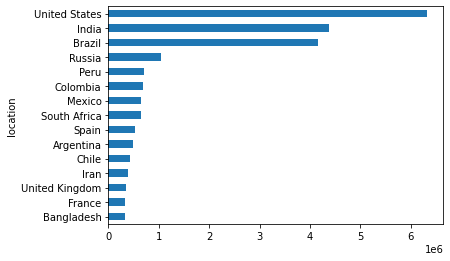

In [180]:
df_copy = df.copy(deep=True)
# remove world values and hong kong
df_copy = df_copy[df_copy.location != 'World']
df_copy = df_copy[df_copy.location != 'Hong Kong']
x = df_copy.groupby('location')['total_cases'].last().sort_values().tail(15)
x.plot(kind='barh')

The bar chart below shows each countries total deaths from the last date reported in the data set. This is important to show the magnitude of covid deaths for each country and track the countries with the most casualties.

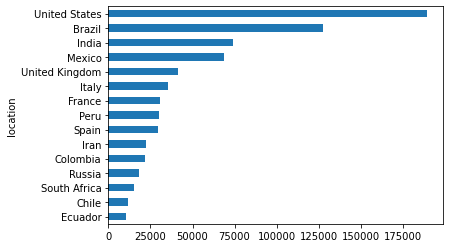

In [179]:
x = df_copy.groupby('location')['total_deaths'].last().sort_values().tail(15)
x.plot(kind='barh')

The first bar chart shows the top 10 countries with the largest total_cases and their stringency_index. The second bar chart shows the last 10 countries with the largest total_cases and their stringency_index. This demonstrates that the stringency_index of the country gets lowered depending on the number of total_cases. The countries with the lowest total cases have lower stringency_indexes. This makes sense because the countries have limited the spread of covid, allowing the population to limit restrictions. 

Bar graph of the top 10 countries with the most cases of COVID and their stringency indexes.


<ipython-input-219-a390845199b3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = df_copy.groupby('location')['total_cases', 'stringency_index'].last().sort_values(by='total_cases').tail(15).groupby('location')['stringency_index'].last().sort_values().tail(15)


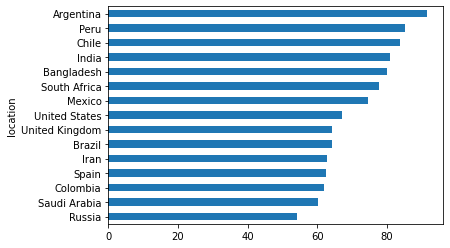

In [219]:
print("Bar graph of the top 10 countries with the most cases of COVID and their stringency indexes.")
x = df_copy.groupby('location')['total_cases', 'stringency_index'].last().sort_values(by='total_cases').tail(15).groupby('location')['stringency_index'].last().sort_values().tail(15)
# print(x)
x.plot(kind='barh')

Bar graph of the 10 countries with the least cases of COVID and their stringency indexes.


<ipython-input-220-1b3d04c6ae0a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = df_copy.groupby('location')['total_cases', 'stringency_index'].last().sort_values(by='total_cases').head(15).groupby('location')['stringency_index'].last().sort_values().tail(15)


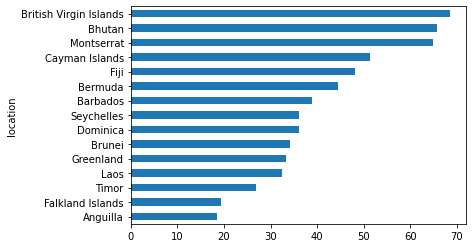

In [220]:
print("Bar graph of the 10 countries with the least cases of COVID and their stringency indexes.")
x = df_copy.groupby('location')['total_cases', 'stringency_index'].last().sort_values(by='total_cases').head(15).groupby('location')['stringency_index'].last().sort_values().tail(15)
# print(x)
x.plot(kind='barh')

The line charts below shows the rate at which new covid cases and new covid deaths have changed in the U.S. The U.S. was chosen due to it being the country with the most cases and most deaths. 

It is interesting to note that the rate of new deaths have only spiked once and then consistently went down. Meanwhile the rate of new cases have mostly increased. This combination of the two trends could indicate that the U.S. is now better equipped to handle the pandemic. The number of deaths have gone down despite the rise in numbers. We would need more dates to analyze through since this disparity could be due to the number of days covid takes to really seriously affect people. 

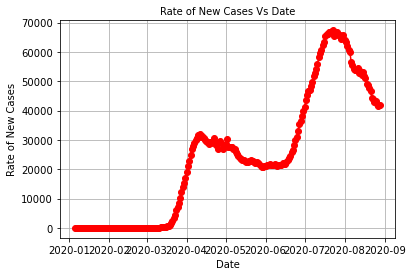

In [231]:
# df_copy = df.groupby['location' == "United States"]
# print(df_copy.loc[df['location'] == 'United States']['date'])
plt.plot(df_copy.loc[df['location'] == 'United States']['date'],df_copy.loc[df['location'] == 'United States']['new_cases_smoothed'], color='red', marker='o')
plt.title('Rate of New Cases Smoothed Vs Date', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Rate of New Cases', fontsize=10)
plt.grid(True)
plt.show()

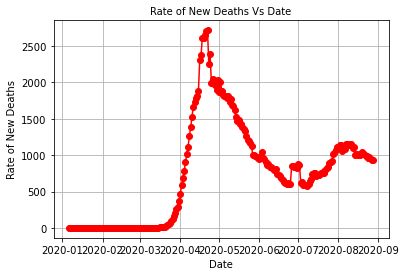

In [232]:
plt.plot(df_copy.loc[df['location'] == 'United States']['date'],df_copy.loc[df['location'] == 'United States']['new_deaths_smoothed'], color='red', marker='o')
plt.title('Rate of New Deaths Smoothed Vs Date', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Rate of New Deaths', fontsize=10)
plt.grid(True)
plt.show()

I will now be looking for trends between the prevalance of pre-existing conditions and number of covid cases in the countries. Multiple news outlets, studies, and healthcare officials have mentioned that pre-existing conditions make people more susceptible to contracting covid and showing symptoms.

I'll be using total_deaths_per_million to compare to the bar graphs of the prevalance of multiple pre-existing conditions. I'll be using total deaths_per_million because it is a measure of deaths per the population of the country. This will help me analyze whether each country's rate of pre-existing conditions within their population are related to the deaths. It is known that covid affects those with pre-existing conditions more than those without said conditions. 

The following bar graphs will be of the countries with the highest rate of cardiovasc_death rate, diabetes_prevalence, female_smokers, and male_smokers. 

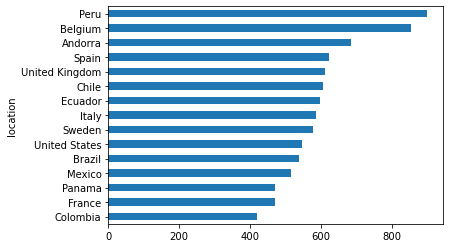

In [248]:
x = df_copy.groupby('location')['total_deaths_per_million'].last().sort_values().tail(15)
x.plot(kind='barh')

Top 15 Countries with Highest Cardiovascular Death Rates


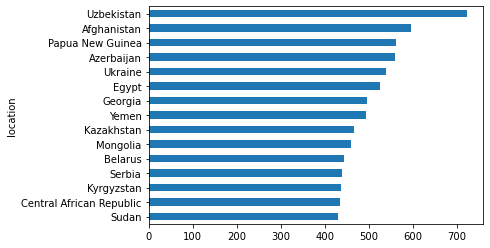

In [250]:
# remove countries with nan values for cardiovasc_death_rate
df_copy['cardiovasc_death_rate'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['cardiovasc_death_rate'], inplace=True)
# print bar graph
print("Top 15 Countries with Highest Cardiovascular Death Rates")
x = df_copy.groupby('location')['cardiovasc_death_rate'].last().sort_values().tail(15)
x.plot(kind='barh')

Top 15 Countries with Highest diabetes_prevalence


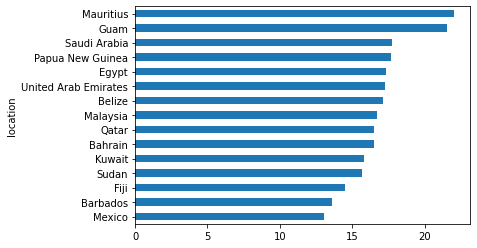

In [251]:
# remove countries with nan values for diabetes_prevalence
df_copy['diabetes_prevalence'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['diabetes_prevalence'], inplace=True)
# print bar graph
print("Top 15 Countries with Highest diabetes_prevalence")
x = df_copy.groupby('location')['diabetes_prevalence'].last().sort_values().tail(15)
x.plot(kind='barh')

Top 15 Countries with Highest female_smokers


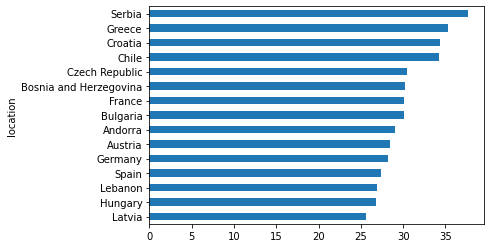

In [252]:
# remove countries with nan values for female_smokers
df_copy['female_smokers'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['female_smokers'], inplace=True)
# print bar graph
print("Top 15 Countries with Highest female_smokers")
x = df_copy.groupby('location')['female_smokers'].last().sort_values().tail(15)
x.plot(kind='barh')

Top 15 Countries with Highest male_smokers


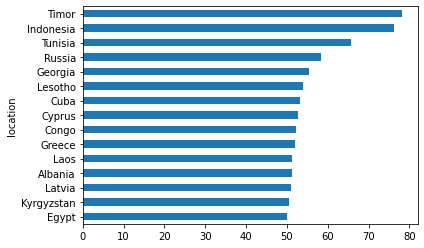

In [254]:
# remove countries with nan values for male_smokers
df_copy['male_smokers'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['male_smokers'], inplace=True)
# print bar graph
print("Top 15 Countries with Highest male_smokers")
x = df_copy.groupby('location')['male_smokers'].last().sort_values().tail(15)
x.plot(kind='barh')

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

## Missing Values
The two code boxes below are being used to check which attributes are missing values. The only attributes without missing values are the RECID, location, and date. This makes sense because these are attributes that would never be missing because they are always present despite whether or not covid data was available to be logged. There are many missing values for all attributes that have been aggregated through counting and reporting. The missing values might have been due to poor aggregation of information or inability to do so. I might need to know why these missing values exists. It could tell me something about the state of the country regarding covid. For example, resources for data aggregation might not be available; this could mean the location does not have as much resources in total and can affect how they respond to the pandemic.

In [264]:
# total missing values for each feature
print("Missing attributes are labeled with False label: ")
print(df.isnull().sum)

Missing attributes are labeled with False label: 
<bound method DataFrame.sum of        RECID  iso_code  continent  location   date  total_cases  new_cases  \
0      False     False      False     False  False        False      False   
1      False     False      False     False  False        False      False   
2      False     False      False     False  False        False      False   
3      False     False      False     False  False        False      False   
4      False     False      False     False  False        False      False   
...      ...       ...        ...       ...    ...          ...        ...   
42644  False      True       True     False  False        False       True   
42645  False      True       True     False  False        False       True   
42646  False      True       True     False  False        False       True   
42647  False      True       True     False  False        False       True   
42648  False      True       True     False  False        Fal

In [260]:
missing = df.isna()
missing.head()
num_missing = missing.sum()
print("Missing values for each attribute:")
print(num_missing)

RECID                                  0
iso_code                             254
continent                            508
location                               0
date                                   0
total_cases                          575
new_cases                            765
new_cases_smoothed                  1548
total_deaths                         575
new_deaths                           765
new_deaths_smoothed                 1548
total_cases_per_million              829
new_cases_per_million                829
new_cases_smoothed_per_million      1612
total_deaths_per_million             829
new_deaths_per_million               829
new_deaths_smoothed_per_million     1612
new_tests                          28319
total_tests                        27965
total_tests_per_thousand           27965
new_tests_per_thousand             28319
new_tests_smoothed                 26541
new_tests_smoothed_per_thousand    26541
tests_per_case                     27717
positive_rate   

## Duplicate Data
In the below code boxes, I examine duplicate data that may exist in the data set. The atttributes that should not have any duplicates include RECID and the combination of location and date. Data from the same place and data probably contains the same data for all the other attributes and is redundant.

I can conclude that from the results there are no duplicate pieces of data in the dataset for RECID's. However, there are duplicates with regards to location and date. This means that there are rows in the data that have duplicates. There are about 

In [282]:
print("Count of duplicates per RECID: ")
duplicates = df.pivot_table(index=['RECID'], aggfunc='size')
print(duplicates)
print("Sum of duplicates of RECID: ")
duplicates_sum = df.pivot_table(index=['RECID'], aggfunc='size').sum()
print(duplicates_sum)

Count of duplicates per RECID: 
RECID
1        1
2        1
3        1
4        1
5        1
        ..
42645    1
42646    1
42647    1
42648    1
42649    1
Length: 42649, dtype: int64
Sum of duplicates of RECID: 
42649


In [338]:
print("Count of duplicates per location and date : ")
duplicates = df.pivot_table(index=['location', 'date'], aggfunc='size')
print(duplicates)
print("Sum of duplicates of location and date: ")
duplicates_sum = df.pivot_table(index=['location', 'date'], aggfunc='size').sum()
print(duplicates_sum)
total_length = 42644
print("Total duplicates: ")
print(duplicates_sum-total_length)

Count of duplicates per location and date : 
location     date      
Afghanistan  2019-12-31    1
             2020-01-01    1
             2020-01-02    1
             2020-01-03    1
             2020-01-04    1
                          ..
Zimbabwe     2020-09-05    1
             2020-09-06    1
             2020-09-07    1
             2020-09-08    1
             2020-09-09    1
Length: 42644, dtype: int64
Sum of duplicates of location and date: 
42649
Total duplicates: 
5


## Outliers
It makes sense to look for outliers in the following attributes: stringency_index, life_expectancy, median_age, aged_65_older, and aged_70_older because the data in all the countries in the world should be comparably around the same value. If there are outliers in these aatributes then that might be a piece of data that is untrustworthy.

It also makes sense to look for outliers regarding gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, make_smokers, handwashing_facilities, hospital_beds_per_household because outliers in these attributes may indicate pre-existing conditions that might affect the spread of covid-19.

Box plot for stringency_index to find outliers: 


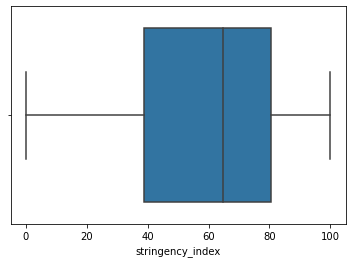

In [299]:
print("Box plot for stringency_index to find outliers: ")
sns.boxplot(x=df['stringency_index'])


Box plot for life_expectancy to find outliers: 


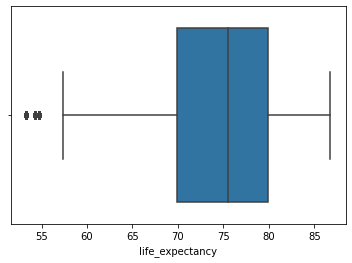

In [311]:
print("Box plot for life_expectancy to find outliers: ")
sns.boxplot(x=df['life_expectancy'])


Box plot for median_age to find outliers: 


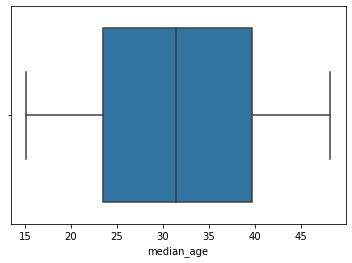

In [300]:
print("Box plot for median_age to find outliers: ")
sns.boxplot(x=df['median_age'])


Box plot for aged_70_older to find outliers: 


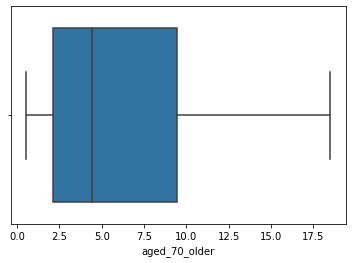

In [302]:
print("Box plot for aged_70_older to find outliers: ")
sns.boxplot(x=df['aged_70_older'])


Box plot for aged_65_older to find outliers: 


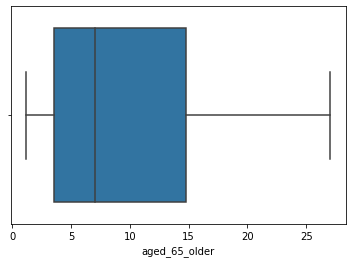

In [301]:
print("Box plot for aged_65_older to find outliers: ")
sns.boxplot(x=df['aged_65_older'])


Box plot for gdp_per_capita to find outliers: 


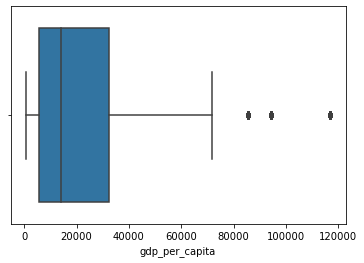

In [303]:
print("Box plot for gdp_per_capita to find outliers: ")
sns.boxplot(x=df['gdp_per_capita'])


Box plot for extreme_poverty to find outliers: 


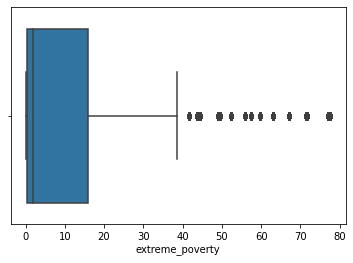

In [304]:
print("Box plot for extreme_poverty to find outliers: ")
sns.boxplot(x=df['extreme_poverty'])


Box plot for cardiovasc_death_rate to find outliers: 


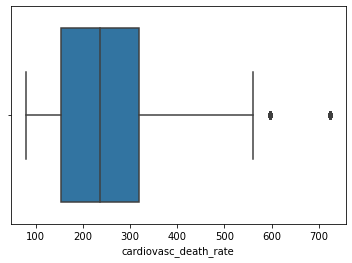

In [305]:
print("Box plot for cardiovasc_death_rate to find outliers: ")
sns.boxplot(x=df['cardiovasc_death_rate'])


Box plot for diabetes_prevalence to find outliers: 


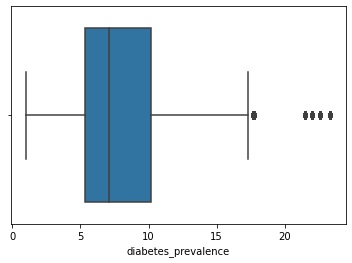

In [306]:
print("Box plot for diabetes_prevalence to find outliers: ")
sns.boxplot(x=df['diabetes_prevalence'])


Box plot for female_smokers to find outliers: 


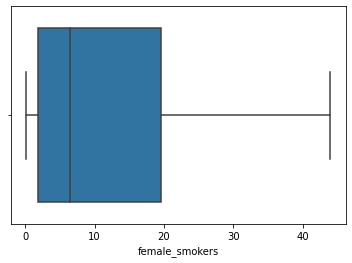

In [307]:
print("Box plot for female_smokers to find outliers: ")
sns.boxplot(x=df['female_smokers'])


Box plot for male_smokers to find outliers: 


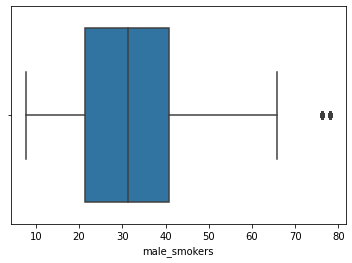

In [308]:
print("Box plot for male_smokers to find outliers: ")
sns.boxplot(x=df['male_smokers'])


Box plot for handwashing_facilities to find outliers: 


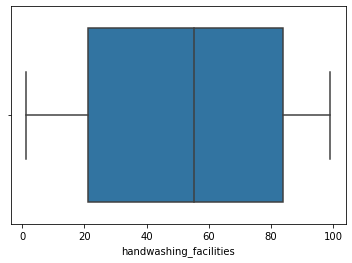

In [309]:
print("Box plot for handwashing_facilities to find outliers: ")
sns.boxplot(x=df['handwashing_facilities'])


Box plot for hospital_beds_per_thousand to find outliers: 


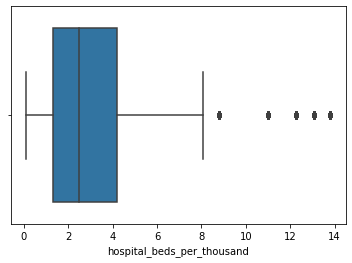

In [310]:
print("Box plot for hospital_beds_per_thousand to find outliers: ")
sns.boxplot(x=df['hospital_beds_per_thousand'])


***
## Section: 2.5 - Explore the relationships among the attributes, excluding the class attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

## Relationships Between Attributes
It is worthwile to look at some relationships between attributes. Since this is a COVID dataset, it will be worthwhile to inspect relationships between the total_deaths and various pre-existing conditions per country. In this section, I will be examining the relationship between the total_deaths and various pre-existing conditions. This is to examine if pre-existing conditions might be related to number of deaths, since it is known that pre-existing conditions make people more susceptible to covid-19.

I will also be examining the relationship between total_cases and stringency_index. I will examine these two because I would like to see if the total number of cases is affected by the stringency index of each country. 

I will be using Pearson's Correlation Coefficient."The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation." (from https://machinelearningmastery.com/)

In [325]:
print("Correlation betweem total_deaths and cardiovasc_death_rate")
# remove countries with nan values 
df_copy['total_deaths'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_deaths'], inplace=True)
df_copy['cardiovasc_death_rate'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['cardiovasc_death_rate'], inplace=True)

#find pearson's r
x = df_copy['total_deaths']
y = df_copy['cardiovasc_death_rate']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_deaths and cardiovasc_death_rate
Pearson's R-value:  -0.13858411405567841
Weak correlation.


In [326]:
print("Correlation betweem total_deaths and diabetes_prevalence")
# remove countries with nan values 
df_copy['total_deaths'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_deaths'], inplace=True)
df_copy['diabetes_prevalence'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['diabetes_prevalence'], inplace=True)

#find pearson's r
x = df_copy['total_deaths']
y = df_copy['diabetes_prevalence']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_deaths and diabetes_prevalence
Pearson's R-value:  0.041125049954091296
Weak correlation.


In [327]:
print("Correlation betweem total_deaths and female_smokers")
# remove countries with nan values 
df_copy['total_deaths'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_deaths'], inplace=True)
df_copy['female_smokers'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['female_smokers'], inplace=True)

#find pearson's r
x = df_copy['total_deaths']
y = df_copy['female_smokers']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_deaths and female_smokers
Pearson's R-value:  0.11757637450326959
Weak correlation.


In [328]:
print("Correlation betweem total_deaths and male_smokers")
# remove countries with nan values 
df_copy['total_deaths'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_deaths'], inplace=True)
df_copy['male_smokers'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['male_smokers'], inplace=True)

#find pearson's r
x = df_copy['total_deaths']
y = df_copy['male_smokers']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_deaths and male_smokers
Pearson's R-value:  -0.08537479132655805
Weak correlation.


In [329]:
print("Correlation betweem total_deaths and aged_65_older")
# remove countries with nan values 
df_copy['total_deaths'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_deaths'], inplace=True)
df_copy['aged_65_older'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['aged_65_older'], inplace=True)

#find pearson's r
x = df_copy['total_deaths']
y = df_copy['aged_65_older']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_deaths and aged_65_older
Pearson's R-value:  0.13159860387931124
Weak correlation.


In [330]:
print("Correlation betweem total_deaths and extreme_poverty")
# remove countries with nan values 
df_copy['total_deaths'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_deaths'], inplace=True)
df_copy['extreme_poverty'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['extreme_poverty'], inplace=True)

#find pearson's r
x = df_copy['total_deaths']
y = df_copy['extreme_poverty']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_deaths and extreme_poverty
Pearson's R-value:  -0.10025615856776468
Weak correlation.


In [331]:
print("Correlation betweem total_cases and stringency_index")
# remove countries with nan values 
df_copy['total_cases'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['total_cases'], inplace=True)
df_copy['stringency_index'].replace('', np.nan, inplace=True)
df_copy.dropna(subset=['stringency_index'], inplace=True)

#find pearson's r
x = df_copy['total_cases']
y = df_copy['stringency_index']
r_val = scipy.stats.pearsonr(x,y)[0]
print("Pearson's R-value: ", r_val)
if r_val > 0.5:
    print("Notable correlation. Positive correlation.")
elif r_val < -0.5:
    print("Notable correlation. Negative correlation.")
else:
    print("Weak correlation.")

Correlation betweem total_cases and stringency_index
Pearson's R-value:  0.09874509674288592
Weak correlation.


***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier visualizations or create new ones.
***

## Interesting Relationships

- There is a weak, positive correlation between the total_cases and stringency_index of the countries. This makes sense since if there are more covid positive cases in the country, then the government of the wountry will want to limit spread with lockdowns and limitations on the population. 
- There is a weak, positive correlation between the total_cases and aged_65_older. This correlation makes sense since it is known that the older population is more susceptible to covid-19.
- Interestingly there is a weak, negative correlation between total_cases and cardiovasc_death_rate. This is strange since a higher cardiovascular death rate indicates that there are more people succumbing to cadrivascular diseases, which is a pre-existing condition. It would seem that there should be a positive correlation between the two instead.


***
# Section: 3 - Data Processing
- Based on the insights gleaned in the data understanding phase, determine what type of processing that you would like to do to create a final dataset to be used for future modeling.
- One of the final outputs of your program should be the creation of a dataset (can be in the format of a Python data frame) which has all of the attributes you would like to use for the modeling phase of a project, as well as dealing with any outliers, noise or missing values.
***

***
## Section: 3.1 - What attributes do you decide to keep or remove? Please justify.
***

## Attributes to keep
The attributes below can be used to find various relationships and trends of covid. They can be used to extract information about covid.
- RECID: keep assigned to locations in alphabetical order and at certain dates in chronological order
- location: need country to track location where data came from 
- date: use to see how covid develops
- total_cases:
- new_cases: ratio, total number of new covid cases during the date	
- new_cases_smoothed: ratio, moving average from the day before to the day after each date shown of total number of new covid cases 
- total_deaths: ratio, total number of covid deaths 
- new_deaths: ratio, total number of new covid deaths during the date	
- new_deaths_smoothed: ratio, moving average from the day before to the day after each date shown of total number of new covid deaths
- new_tests: ratio, total number of new covid tests during the date	 
- total_tests: ratio, total number of covid tests		
- new_tests_smoothed: ratio, moving average from the day before to the day after each date shown of total number of new covid tests
- tests_per_case: ratio, number of tests per covid case	
- positive_rate: ration, positive rate of tested in country
- stringency_index: ratio, computable parameter for evaluating the effectiveness of the nationwide lockdown	
- population: ratio, population of the location	
- population_density: ratio, number of people living in each unit of area (most likely square kilometers)	
- median_age: ratio, median age of the location's population	
- aged_65_older: ratio, percentage of population that is 65 or older	
- aged_70_older: ratio, percentage of population that is 70 or older	
- gdp_per_capita: ratio, measure of a country's economic output per person	
- extreme_poverty:ratio, percentage of population in extreme poverty	
- cardiovasc_death_rate: ratio, Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) 	
- diabetes_prevalence: ratio, percentage of population with diabetes	
- female_smokers: ratio, percentage of female smokers from the population
- male_smokers: ratio, percentage of male smokers from the population
- handwashing_facilities: ratio, share of the population with basic handwashing facilities on premises, most recent year available	
- hospital_beds_per_thousand: ratio, Hospital beds per 1,000 people, most recent year available since 2010	
- life_expectancy: ratio, life expectancy at birth 	

## Attributes to remove 
- iso_code: redundant
- continent: irrelevant	 
- total_cases_per_million: redundant, can calculate using other attributes
- new_cases_per_million: redundant, can calculate using other attributes
- new_cases_smoothed_per_million:redundant, can calculate using other attributes
- total_deaths_per_million: redundant, can calculate using other attributes
- new_deaths_per_million: redundant, can calculate using other attributes
- new_deaths_smoothed_per_million: redundant, can calculate using other attributes
- total_tests_per_thousand: redundant, can calculate using other attributes
- new_tests_per_thousand: redundant, can calculate using other attributes	
- new_tests_smoothed_per_thousand: redundant, can calculate using other attributes
- tests_units: irrelevant
- NEW_CASE_TREND: redundant

In [333]:
# remove attributes
df.drop(columns=['iso_code','continent','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','total_tests_per_thousand'])
df.drop(columns=['new_tests_per_thousand','new_tests_smoothed_per_thousand','tests_units','NEW_CASE_TREND'])

,RECID,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,1,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,2,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,3,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,4,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,5,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42644,42645,NaN,NaN,International,2020-09-05,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42645,42646,NaN,NaN,International,2020-09-06,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42646,42647,NaN,NaN,International,2020-09-07,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42647,42648,NaN,NaN,International,2020-09-08,696.0,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
## Section: 3.2 - Did you decide to implement any attribute transformations? If so, why?
***

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
***

***
## Section: 3.4 - Implement any data cleaning steps previously identified.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

## Cleaning NaN values, duplicate values
I have decided to remove the rows with NaN values because it would not be accurate to replace NaN values with estimates and these rows cannot be used later on. I have also decided to remove duplicate values and outliers to remove extra data that might affect analysis. I am not going to delete any outliers since they may be indicative of different situations in different countries.

In [ ]:
df_original = df.copy(deep=True)

# removing rows with at least one NaN values
df.dropna()

missing = df.isna()
missing.head()
num_missing = missing.sum()
print("Missing values for each attribute:")
print(num_missing)

# removing duplicates of combination of location and date
df.drop_duplicates(subset=['location','date'])

print("Sum of duplicates of location and date: ")
duplicates_sum = df.pivot_table(index=['location', 'date'], aggfunc='size').sum()
print(duplicates_sum)
total_length = 42644
print("Total duplicates: ")
print(duplicates_sum-total_length)

# # removing outlier values
# z_scores = scipy.stats.zscore(df)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df = df[filtered_entries]
# print(df)

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? Identify and explain any interesting relationships between the class attribute and the other attributes. You may refer to earlier visualizations or create new ones.?
***

## Conclusions
I have concluded that the dataset is very rich with information. Many atttributes were removed for being irrelevant or redundant. Despite removing some aatributes, the dataset will be usable for implementing trend and relationship analysis. I learned that there are some interesting relationships between some of the attributes. As can be seen in previous visualization, the total_cases and stringency_index have a weak, positive correlation. This makes sense because the more cases a country has the more rules and regulations needed to help prevent the spread of COVID. Also, there is a weak, positive correlation between the total_cases and aged_65_older. This correlation makes sense since it is known that the older population is more susceptible to covid-19.

Overall this dataset will be helpful in finding trends of COVID cases growth over the pandemic. It will also be helpful in finding correlations and relationships between covid susceptibility of a population and the population's socio-economic demographics and health demographics.